# Sampling Methods

In [1]:
import pandas as pd
from random import choice
from random import randint
from random import randrange

In [2]:
population = pd.read_csv("population.csv")
population.index = pd.Index(i for i in range(1,5001,1))
display(population.info())
display(population.shape)
display(population.head(10))
display(population.tail(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 18 columns):
Address       5000 non-null object
Age           5000 non-null int64
City          5000 non-null object
Education     5000 non-null object
Employment    5000 non-null object
Fertility     5000 non-null int64
FirstName     5000 non-null object
FullName      5000 non-null object
Gender        5000 non-null object
HairColor     5000 non-null object
Height        5000 non-null float64
LastName      5000 non-null object
MiddleI       5000 non-null object
Race          5000 non-null object
Salary        5000 non-null float64
State         5000 non-null object
Weight        5000 non-null int64
Zip           5000 non-null int64
dtypes: float64(2), int64(4), object(12)
memory usage: 742.2+ KB


None

(5000, 18)

,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip
1,4311 N. Wright Street,18,Winterfell,HS,U,1,Payton,Payton C. Cole,M,Blonde,64.45,Cole,C.,W,55.00,GA,201,49321
2,2289 W. Pine Street,66,Buffalo,PHD,C,2,Andres,Andres J. Brown,M,Black,68.00,Brown,J.,W,58.50,NY,161,63404
3,4745 W. Elm Road,41,Sacramento,HS,H,3,Wayne,Wayne C. Robinson,M,Red,73.41,Robinson,C.,W,51.00,CA,177,78798
4,2499 W. 91st Street,41,New York,MAS,H,1,Jamie,Jamie N. Johnson,F,Brown,58.89,Johnson,N.,W,50.70,NY,181,46926
5,5414 N. 34 Street,66,Smalltown,4YD,H,2,Jordan,Jordan H. Fields,F,Black,65.11,Fields,H.,B,42.90,RI,144,70243
6,4708 S. Maple Street,69,Mordor,GS,E,1,Nathan,Nathan J. Rogers,M,Brown,69.16,Rogers,J.,W,72.00,DE,152,86183
7,2673 E. GreenField Avenue,18,Dawnstar,HS,E,1,Kathryn,Kathryn M. Nichols,F,Brown,60.49,Nichols,M.,W,56.16,PA,165,13152
8,3904 N. Becher Blvd.,62,Mordor,PHD,H,4,Kevin,Kevin F. Jones,M,Blonde,71.43,Jones,F.,W,57.50,MS,211,22160
9,5657 S. Pearl Street,71,Lake Delton,PHD,S,3,Alexia,Alexia L. Hill,F,Brown,63.45,Hill,L.,W,49.92,WI,112,23549
10,4707 W. Lake Road,57,Buffalo,2YD,C,0,Fay,Fay N. Harris,F,Black,67.65,Harris,N.,W,57.72,NY,127,42447


,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip
4991,8895 S. Townsend Road,62,River West,PHD,E,0,Michele,Michele I. Wood,F,Brown,60.93,Wood,I.,W,49.92,OH,142,91131
4992,1377 S. 95th Street,31,Midland,HS,L,0,Elmer,Elmer D. Cook,M,Black,73.98,Cook,D.,W,55.00,TX,180,42493
4993,8788 S. 84th Blvd.,34,Sunnydale,HS,H,3,Janice,Janice J. Carter,F,Brown,67.35,Carter,J.,W,39.78,DE,175,24165
4994,3745 N. 95th Blvd.,47,Westworld,MAS,C,1,Jeanne,Jeanne N. Johnson,F,Brown,60.94,Johnson,N.,W,50.70,CO,146,60075
4995,7759 E. Hill Avenue,34,Midland,GS,H,1,Vicki,Vicki R. Jordan,F,Brown,66.00,Jordan,R.,W,44.85,TX,192,79784
4996,7990 E. Clarke Street,65,Dawnstar,PHD,E,2,Sharise,Sharise H. Franklin,F,Black,60.47,Franklin,H.,B,47.58,NC,155,24706
4997,5265 E. Washington Avenue,31,Oldtown,4YD,C,3,Chante,Chante C. Gray,M,Black,78.59,Gray,C.,B,61.00,RI,166,88318
4998,3982 W. Becher Street,72,Orlando,PHD,E,2,Nancy,Nancy A. Stewart,F,Blonde,60.11,Stewart,A.,W,39.00,FL,131,73194
4999,8486 N. Oak Street,20,Smalltown,GS,U,2,Sarah,Sarah E. Phillips,F,Black,60.31,Phillips,E.,W,49.53,NE,192,53061
5000,6631 S. Holton Avenue,63,Dawnstar,PHD,S,2,Willie,Willie F. Henry,M,Black,67.99,Henry,F.,B,74.00,PA,159,50699


In [3]:
# eof variable is used in selection processes as the 'stop' point in a range
# must be number of rows + 1 because the eof is not included in the range, this ensures the last row is included in the range
eof = population.shape[0] + 1
display(eof)

5001

## ------------------------------------------------------------------------------------------------------------------------------

# Simple Random Sample (SRS)
	• The most ideal method for sampling.
	• Give each object in the population a unique number tag (UNT), use random process to select sample from these UNTs.
	• Each object is equally likely to be selected.
	• This produces an unbiased sample, which is hoped to be representative.
    
The dataframe index  is used as the UNT.

In [4]:
# use a random process to select a list of unique number tags from the available population tags.
List = []
for index in range (0,10):
    List.append(randrange(1,eof))
display(List)

[2369, 3257, 2163, 233, 4618, 4437, 791, 484, 476, 5]

In [5]:
# pull the observations into the samples for the randomly generated list of unique number tags.
sample = population.loc[List]
display(sample)

,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip
2369,4331 E. Maple Blvd.,76,Sacramento,4YD,L,4,Natalie,Natalie M. Anderson,F,Blonde,63.35,Anderson,M.,W,45.63,CA,118,71335
3257,2734 W. Locust Street,62,Epicburg,HS,H,1,Kathy,Kathy M. Wood,F,Red,63.32,Wood,M.,W,50.70,WA,152,25943
2163,6097 S. Holton Avenue,56,Chico,2YD,C,0,Viola,Viola A. Thomas,F,Brown,64.32,Thomas,A.,W,57.33,CA,154,32696
233,3114 S. Garfield Road,66,Braavos,PHD,E,2,Clayton,Clayton D. Patterson,M,Brown,65.56,Patterson,D.,W,63.50,PA,158,28536
4618,4496 S. Pine Road,28,Braavos,HS,U,2,Albert,Albert C. White,M,Brown,66.81,White,C.,W,60.00,ME,153,55946
4437,7382 W. Oak Road,60,Oldtown,2YD,L,0,Tiana,Tiana A. Gibson,F,Black,64.81,Gibson,A.,B,39.78,LA,127,78031
791,7677 E. Maple Blvd.,44,Waco,PHD,L,0,Deborah,Deborah M. Green,F,Brown,60.82,Green,M.,W,56.16,TX,145,62140
484,616 N. Park Road,76,Sacramento,GS,U,1,Darrell,Darrell S. Weaver,M,Black,68.10,Weaver,S.,W,51.00,CA,184,12588
476,9617 S. Becker Street,28,New York,GS,H,0,Tara,Tara M. Murphy,F,Brown,67.94,Murphy,M.,W,41.34,NY,125,50363
5,5414 N. 34 Street,66,Smalltown,4YD,H,2,Jordan,Jordan H. Fields,F,Black,65.11,Fields,H.,B,42.90,RI,144,70243


In [6]:
# write the simple random sample to a csv file
sample.to_csv('SimpleRandomSample.csv',index=False)

## -----------------------------------------------------------------------------------------------------------------------------

# Systematic Sampling
	• Choose a starting point at random
	• Then systematically select objects at a defined interval.
	• Example: If there were 1,000 objects in a population and you wanted a sample of 50, you would take every 20th object.
	• However, if there is a pattern in the population certain types of objects could be chosen more/less often than others.

In [7]:
# choose a starting point at random
starting_point = randint(1, 5)
display(starting_point)

5

In [8]:
# define interval
interval = 5

In [9]:
# systematically select objects from the population:
# starting at the randomly selected starting point
# using a defined interval
List = [i for i in range(starting_point,eof,interval)]
display(len(List))
print(List)

1000

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995, 1000, 1005, 1010, 1015, 

In [10]:
# pull the observations into the samples for the systematically generated list.
sample = population.loc[List]
display(sample.head())
display(sample.tail())

,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip
5,5414 N. 34 Street,66,Smalltown,4YD,H,2,Jordan,Jordan H. Fields,F,Black,65.11,Fields,H.,B,42.90,RI,144,70243
10,4707 W. Lake Road,57,Buffalo,2YD,C,0,Fay,Fay N. Harris,F,Black,67.65,Harris,N.,W,57.72,NY,127,42447
15,991 E. Hill Avenue,36,Westworld,GS,U,0,Beatrice,Beatrice M. Hayes,F,Brown,73.61,Hayes,M.,W,42.90,NC,126,12035
20,7779 N. Becher Road,76,Springfield,PHD,S,2,Ralph,Ralph D. Reynolds,M,Black,69.64,Reynolds,D.,W,62.00,MS,167,79880
25,3823 S. Townsend Road,72,Miami,4YD,E,0,Amanda,Amanda M. Scott,F,Red,64.14,Scott,M.,W,39.78,FL,125,67567


,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip
4980,7878 W. Park Road,42,Lakeview,4YD,U,2,James,James G. Carter,M,Blonde,68.35,Carter,G.,W,51.00,RI,143,63240
4985,455 E. Main Street,56,Springfield,HS,S,2,Julia,Julia I. Cook,F,Red,70.46,Cook,I.,W,44.07,NH,140,72161
4990,8173 E. Lake Avenue,40,Olympus,4YD,H,3,Katie,Katie E. Gibson,F,Black,60.30,Gibson,E.,B,41.34,WY,162,38179
4995,7759 E. Hill Avenue,34,Midland,GS,H,1,Vicki,Vicki R. Jordan,F,Brown,66.00,Jordan,R.,W,44.85,TX,192,79784
5000,6631 S. Holton Avenue,63,Dawnstar,PHD,S,2,Willie,Willie F. Henry,M,Black,67.99,Henry,F.,B,74.00,PA,159,50699


In [11]:
# write the systematic sample to a csv file
sample.to_csv('SystematicSample.csv',index=False)

## -----------------------------------------------------------------------------------------------------------------------------

# Cluster Sampling
	• The population is divided into clusters, and then a cluster is chosen at random.
	• The process at diving the population into clusters must not include the parameter being measured.
	• Example: if doing a study on weight, the clusters cannot be defined by weight.
	• Example: Departments of a business can be clusters or neighborhoods within a city.
	• When a cluster is randomly chosen, all of the objects within the cluster are randomly chosen.
	• Cluster sampling can be more convenient and practical than simple random sampling.
	• However, if the clusters are different from each other with regard to the parameter being measured, this can lead to bias or non-representativeness in the sample.

In [12]:
# add a new column to the dataframe called 'cluster', temporalily valued at 0
population['cluster'] = int(0)
display(population[['cluster','FullName']].head(5))

,cluster,FullName
1,0,Payton C. Cole
2,0,Andres J. Brown
3,0,Wayne C. Robinson
4,0,Jamie N. Johnson
5,0,Jordan H. Fields


### assign each observation in the population to one of the clusters

In [13]:
# specify the number of clusters
number_of_clusters = 5

cluster_number = 0
for i, v in population['cluster'].iteritems(): # iterate thru the observations
    
    # cycle thru cluster numbers
    cluster_number = cluster_number + 1
    if cluster_number > number_of_clusters:
        cluster_number = 1

    # assign cluster number to the observation
    population.at[i, 'cluster'] = cluster_number

display(population[['cluster','FullName']].head(10))
display(population[['cluster','FullName']].tail(10))

,cluster,FullName
1,1,Payton C. Cole
2,2,Andres J. Brown
3,3,Wayne C. Robinson
4,4,Jamie N. Johnson
5,5,Jordan H. Fields
6,1,Nathan J. Rogers
7,2,Kathryn M. Nichols
8,3,Kevin F. Jones
9,4,Alexia L. Hill
10,5,Fay N. Harris


,cluster,FullName
4991,1,Michele I. Wood
4992,2,Elmer D. Cook
4993,3,Janice J. Carter
4994,4,Jeanne N. Johnson
4995,5,Vicki R. Jordan
4996,1,Sharise H. Franklin
4997,2,Chante C. Gray
4998,3,Nancy A. Stewart
4999,4,Sarah E. Phillips
5000,5,Willie F. Henry


### randomly choose which cluster to use as the sample

In [14]:
cluster_choice = randint(1, number_of_clusters)
print("randomly chosen cluster: ", cluster_choice)
sample = population.loc[(population['cluster'] == cluster_choice)]
display(sample.head())
display(sample.tail())

randomly chosen cluster:  2


,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
2,2289 W. Pine Street,66,Buffalo,PHD,C,2,Andres,Andres J. Brown,M,Black,68.00,Brown,J.,W,58.50,NY,161,63404,2
7,2673 E. GreenField Avenue,18,Dawnstar,HS,E,1,Kathryn,Kathryn M. Nichols,F,Brown,60.49,Nichols,M.,W,56.16,PA,165,13152,2
12,2284 E. Washington Avenue,67,Winterfell,MAS,L,6,Carsandra,Carsandra A. Robinson,F,Black,63.07,Robinson,A.,B,44.07,DE,124,11350,2
17,5769 S. Oak Road,21,Los Angeles,GS,S,3,Kasen,Kasen A. Ross,M,Brown,70.57,Ross,A.,W,74.00,CA,158,37812,2
22,4850 N. Elm Street,34,Pythonville,2YD,H,3,Nevaeh,Nevaeh M. Bell,F,Black,64.99,Bell,M.,B,49.92,UT,122,87822,2


,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
4977,7346 W. Becker Street,65,River West,MAS,S,1,Wyatt,Wyatt J. Graham,M,Red,72.00,Graham,J.,W,62.00,AZ,196,40213,2
4982,4313 E. 95th Blvd.,25,Olympus,GS,U,1,Jill,Jill A. Jenkins,F,Black,59.17,Jenkins,A.,W,47.58,MS,122,89703,2
4987,5267 N. 84th Street,60,Metropolis,PHD,L,4,Azibo,Azibo J. Nelson,M,Black,60.50,Nelson,J.,B,55.00,GA,189,41708,2
4992,1377 S. 95th Street,31,Midland,HS,L,0,Elmer,Elmer D. Cook,M,Black,73.98,Cook,D.,W,55.00,TX,180,42493,2
4997,5265 E. Washington Avenue,31,Oldtown,4YD,C,3,Chante,Chante C. Gray,M,Black,78.59,Gray,C.,B,61.00,RI,166,88318,2


In [15]:
# write the cluster sample to a csv file
sample.to_csv('ClusterSample.csv',index=False)

### BONUS
- Load clusters into a dictionary
- Convert dictionaried clusters to dataframes
- Write dataframe clusters to individual .csv files

In [16]:
cluster_dictionary = {}

for c in range(1,number_of_clusters+1,1):

    # assign name for each indivual cluster file
    cluster_name = "cluster" + str(c) + ".csv"
    
    # load cluster into dictionary: key = cluster number, value = dataframe
    cluster_dictionary[c] = population.loc[(population['cluster'] == c)]
    
    # create a stand alone dataframe from the cluster stored in the dictionary
    cluster_df = pd.DataFrame(cluster_dictionary[c])
    display(cluster_df.head())
    
    # write the cluster to a csv file
    cluster_df.to_csv(cluster_name,index=False)

,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
1,4311 N. Wright Street,18,Winterfell,HS,U,1,Payton,Payton C. Cole,M,Blonde,64.45,Cole,C.,W,55.0,GA,201,49321,1
6,4708 S. Maple Street,69,Mordor,GS,E,1,Nathan,Nathan J. Rogers,M,Brown,69.16,Rogers,J.,W,72.0,DE,152,86183,1
11,7990 E. Chambers Street,67,Gotham,4YD,U,0,Roman,Roman J. Fox,M,Black,69.67,Fox,J.,W,58.5,VT,188,75810,1
16,6791 E. Cedar Street,36,Valyria,PHD,L,1,Edward,Edward J. Wallace,M,Black,68.86,Wallace,J.,W,55.0,PA,176,80055,1
21,8460 N. North Street,56,Tampa,MAS,L,0,Leopoldo,Leopoldo S. Barrera,M,Black,65.21,Barrera,S.,H,60.0,FL,168,24220,1


,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
2,2289 W. Pine Street,66,Buffalo,PHD,C,2,Andres,Andres J. Brown,M,Black,68.00,Brown,J.,W,58.50,NY,161,63404,2
7,2673 E. GreenField Avenue,18,Dawnstar,HS,E,1,Kathryn,Kathryn M. Nichols,F,Brown,60.49,Nichols,M.,W,56.16,PA,165,13152,2
12,2284 E. Washington Avenue,67,Winterfell,MAS,L,6,Carsandra,Carsandra A. Robinson,F,Black,63.07,Robinson,A.,B,44.07,DE,124,11350,2
17,5769 S. Oak Road,21,Los Angeles,GS,S,3,Kasen,Kasen A. Ross,M,Brown,70.57,Ross,A.,W,74.00,CA,158,37812,2
22,4850 N. Elm Street,34,Pythonville,2YD,H,3,Nevaeh,Nevaeh M. Bell,F,Black,64.99,Bell,M.,B,49.92,UT,122,87822,2


,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
3,4745 W. Elm Road,41,Sacramento,HS,H,3,Wayne,Wayne C. Robinson,M,Red,73.41,Robinson,C.,W,51.00,CA,177,78798,3
8,3904 N. Becher Blvd.,62,Mordor,PHD,H,4,Kevin,Kevin F. Jones,M,Blonde,71.43,Jones,F.,W,57.50,MS,211,22160,3
13,3742 S. Lake Avenue,62,Thundera,2YD,U,2,Jack,Jack J. Butler,M,Black,65.03,Butler,J.,W,64.00,PA,179,23037,3
18,1342 W. 95th Blvd.,57,Tampa,HS,C,0,Alisha,Alisha M. Avila,F,Black,58.87,Avila,M.,H,49.92,FL,158,56079,3
23,8058 W. Cedar Street,52,Chico,HS,C,3,Anita,Anita H. Thomas,F,Brown,60.88,Thomas,H.,W,42.90,CA,139,66660,3


,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
4,2499 W. 91st Street,41,New York,MAS,H,1,Jamie,Jamie N. Johnson,F,Brown,58.89,Johnson,N.,W,50.70,NY,181,46926,4
9,5657 S. Pearl Street,71,Lake Delton,PHD,S,3,Alexia,Alexia L. Hill,F,Brown,63.45,Hill,L.,W,49.92,WI,112,23549,4
14,7875 E. Main Street,34,Fresno,HS,S,0,Regina,Regina E. Gibson,F,Blonde,64.12,Gibson,E.,W,49.53,CA,166,37786,4
19,103 W. 75th Street,20,Fresno,HS,U,0,Joel,Joel J. Mcdonald,M,Blonde,71.24,Mcdonald,J.,W,63.50,CA,215,45111,4
24,9337 N. Pine Street,37,Valyria,HS,E,5,Arthur,Arthur A. Watson,M,Black,69.22,Watson,A.,W,61.00,MS,182,56196,4


,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
5,5414 N. 34 Street,66,Smalltown,4YD,H,2,Jordan,Jordan H. Fields,F,Black,65.11,Fields,H.,B,42.90,RI,144,70243,5
10,4707 W. Lake Road,57,Buffalo,2YD,C,0,Fay,Fay N. Harris,F,Black,67.65,Harris,N.,W,57.72,NY,127,42447,5
15,991 E. Hill Avenue,36,Westworld,GS,U,0,Beatrice,Beatrice M. Hayes,F,Brown,73.61,Hayes,M.,W,42.90,NC,126,12035,5
20,7779 N. Becher Road,76,Springfield,PHD,S,2,Ralph,Ralph D. Reynolds,M,Black,69.64,Reynolds,D.,W,62.00,MS,167,79880,5
25,3823 S. Townsend Road,72,Miami,4YD,E,0,Amanda,Amanda M. Scott,F,Red,64.14,Scott,M.,W,39.78,FL,125,67567,5


#### Besides the individual .csv files created from the clusters, the individuals clusters are available in dictionary slots.

In [17]:
# cluster 1, first five observations
display(cluster_dictionary[1][0:5])

,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
1,4311 N. Wright Street,18,Winterfell,HS,U,1,Payton,Payton C. Cole,M,Blonde,64.45,Cole,C.,W,55.0,GA,201,49321,1
6,4708 S. Maple Street,69,Mordor,GS,E,1,Nathan,Nathan J. Rogers,M,Brown,69.16,Rogers,J.,W,72.0,DE,152,86183,1
11,7990 E. Chambers Street,67,Gotham,4YD,U,0,Roman,Roman J. Fox,M,Black,69.67,Fox,J.,W,58.5,VT,188,75810,1
16,6791 E. Cedar Street,36,Valyria,PHD,L,1,Edward,Edward J. Wallace,M,Black,68.86,Wallace,J.,W,55.0,PA,176,80055,1
21,8460 N. North Street,56,Tampa,MAS,L,0,Leopoldo,Leopoldo S. Barrera,M,Black,65.21,Barrera,S.,H,60.0,FL,168,24220,1


In [18]:
# cluster 2, FullName feature of first five observation in the cluster
display(cluster_dictionary[2][0:5]['FullName']) 

2           Andres J. Brown
7        Kathryn M. Nichols
12    Carsandra A. Robinson
17            Kasen A. Ross
22           Nevaeh M. Bell
Name: FullName, dtype: object

In [19]:
# cluster 3, LastName feature of observation 4 in the cluster 
display(cluster_dictionary[3][3:4]['LastName'])

18    Avila
Name: LastName, dtype: object

## ------------------------------------------------------------------------------------------------------------------------------

# Stratified Sampling
	• This method can seem like cluster sampling
	• However, the "strata" or groups are chosen specifically to represent different characteristics within the population
	• Such as: ethnicity, age, location, or occupation.
	• Within each group a random sample is taken sometimes in proportion to the number of objects within the group.
	• This method can lead to a very good random, representative, and unbiased sample.

In [20]:
total_population = population.shape[0]
display(total_population)

5000

In [21]:
# define the desired sample proportion: the percentage of the population to be in the sample
sample_proportion = .20  #   20%

In [22]:
# calculation desired sample size: count
sample_count = round(total_population * sample_proportion)
display(sample_count)

1000

In [23]:
# define a minimum count threshold for a race to be included in the sample.
# a race must have at least this miniumum number of observations in the population to be included in the sample.
race_inclusion_threshold = 10

In [24]:
# define the minimum number of observation to included in the sample per incuded race
minimum_observations_threshold = 3

In [25]:
race_dictionary = {"A":"Arab", "B":"Black", "H":"Hispanic", "O":"Oriental", "W":"White", "I":"Indian", "X":"Other"}

In [26]:
race_counts = population['Race'].value_counts().sort_index()
print(race_counts)
print(type(race_counts))

A      75
B     632
H     433
I      88
O     114
W    3658
Name: Race, dtype: int64
<class 'pandas.core.series.Series'>


In [27]:
display(race_counts.index)
display(race_counts.index[0])

Index(['A', 'B', 'H', 'I', 'O', 'W'], dtype='object')

'A'

#### Both "Indian" and "other" will be excluded from the sample; those racial categories did not meet the observation threshold count in the population

In [28]:
racial_categories = race_counts[race_counts >= race_inclusion_threshold]
display(racial_categories)
display(racial_categories.index)

A      75
B     632
H     433
I      88
O     114
W    3658
Name: Race, dtype: int64

Index(['A', 'B', 'H', 'I', 'O', 'W'], dtype='object')

#### Create proportial dictionary: the number of observation randomly selected to be included in the sample from each strata, will correspond to the racial proportion in the population.

In [29]:
inclusion_sum           = 0
largest_proportion      = 0
largest_racial_category = " "
racial_count_dictionary = {}
   
for (race, racial_count) in racial_categories.iteritems():    

    racial_proportion = (racial_count / total_population)
    if racial_proportion > largest_proportion:
        largest_proportion      = racial_proportion
        largest_racial_category = race

    racial_sample_count = round((sample_count * racial_proportion))

    racial_count_dictionary[race] = racial_sample_count
   
    inclusion_sum = inclusion_sum + racial_sample_count    

In [30]:
# because neither a population nor a sample can contain a fraction of an observation, and calculating proportions can produce
# fractions of an observation; rounding must be used. This leads to the sum of the number of observation to include by
# racial category to be slitely less or more than the desired sample count. Therefore, the racial_count_dictionary must be 
# adjusted by either substracting or adding the difference to the racial category with the highest proportion in the population. 

if inclusion_sum < sample_count:
    adjustment = round(sample_count - inclusion_sum)
    racial_count_dictionary[largest_racial_category] = (racial_count_dictionary[largest_racial_category] + adjustment)
elif inclusion_sum > sample_count:
    adjustment = round(inclusion_sum - sample_count)
    racial_count_dictionary[largest_racial_category] = (racial_count_dictionary[largest_racial_category] - adjustment)    
    
display(racial_count_dictionary)
display(sum(racial_count_dictionary.values()))

{'A': 15, 'B': 126, 'H': 87, 'I': 18, 'O': 23, 'W': 731}

1000

### Create racial stratas and stratified sample

In [31]:
# create empty data to store the sample, using the same structure as the population dataframe
column_list = (population.columns)
sample = pd.DataFrame(columns=column_list)
display(sample.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 19 columns):
Address       0 non-null object
Age           0 non-null object
City          0 non-null object
Education     0 non-null object
Employment    0 non-null object
Fertility     0 non-null object
FirstName     0 non-null object
FullName      0 non-null object
Gender        0 non-null object
HairColor     0 non-null object
Height        0 non-null object
LastName      0 non-null object
MiddleI       0 non-null object
Race          0 non-null object
Salary        0 non-null object
State         0 non-null object
Weight        0 non-null object
Zip           0 non-null object
cluster       0 non-null object
dtypes: object(19)
memory usage: 0.0+ bytes


None

In [32]:
#sample = pd.DataFrame()

strata_dictionary = {}

for race in racial_categories.index:
       
    display(race)
   
    # assign name for each indivual racial strata file
    strata_csv_name = "strata_" + race_dictionary[race] + ".csv"
    display(strata_csv_name)
    
    # load racial strata into dictionary: key = race abreviation, value = dataframe
    strata_dictionary[race] = population.loc[(population['Race'] == race)]
    
    # create a stand alone dataframe from the racial strata stored in the dictionary
    strata_df = pd.DataFrame(strata_dictionary[race])
    display(strata_df.head())   
    
    # Append the appropriate number of randomly selected observations from the racial strata into the sample
    # as defined in the racial count dictionary. 
    sample = sample.append(strata_df.sample(racial_count_dictionary[race],replace=False),ignore_index=True)    
    
    # write the racial strata to a csv file
    strata_df.to_csv(strata_csv_name,index=False)

'A'

'strata_Arab.csv'

,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
45,4774 N. 17th Blvd.,30,Mordor,HS,C,3,Talat,Talat Masih,M,Black,76.71,Masih,,A,55.0,MN,158,60245,5
56,2388 S. Wright Street,24,Midland,GS,U,1,Matana,Matana Said,F,Black,62.80,Said,,A,39.0,TX,158,26766,1
410,4032 W. Arthur Street,46,Dawnstar,PHD,S,2,Joury,Joury Khoury,F,Black,64.60,Khoury,,A,39.0,VT,137,59805,5
418,6196 S. Becher Street,30,Chico,GS,S,0,Abdul Ahad,Abdul Ahad Tahan,M,Black,70.28,Tahan,,A,74.0,CA,170,37241,3
513,4920 N. Garfield Road,76,Tampa,MAS,E,0,Lula,Lula Nazari,F,Black,65.17,Nazari,,A,39.0,FL,185,24087,3


'B'

'strata_Black.csv'

,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
5,5414 N. 34 Street,66,Smalltown,4YD,H,2,Jordan,Jordan H. Fields,F,Black,65.11,Fields,H.,B,42.90,RI,144,70243,5
12,2284 E. Washington Avenue,67,Winterfell,MAS,L,6,Carsandra,Carsandra A. Robinson,F,Black,63.07,Robinson,A.,B,44.07,DE,124,11350,2
22,4850 N. Elm Street,34,Pythonville,2YD,H,3,Nevaeh,Nevaeh M. Bell,F,Black,64.99,Bell,M.,B,49.92,UT,122,87822,2
31,862 W. Hill Road,43,Epicburg,GS,U,3,Marquis,Marquis J. Crawford,M,Black,70.51,Crawford,J.,B,71.00,ME,159,86491,1
35,1920 N. Washington Avenue,39,Springfield,MAS,H,3,Shantice,Shantice J. Miller,F,Black,64.06,Miller,J.,B,57.33,GA,188,95130,5


'H'

'strata_Hispanic.csv'

,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
18,1342 W. 95th Blvd.,57,Tampa,HS,C,0,Alisha,Alisha M. Avila,F,Black,58.87,Avila,M.,H,49.92,FL,158,56079,3
21,8460 N. North Street,56,Tampa,MAS,L,0,Leopoldo,Leopoldo S. Barrera,M,Black,65.21,Barrera,S.,H,60.00,FL,168,24220,1
32,9486 S. Townsend Road,35,Buffalo,HS,U,4,Hernando,Hernando G. Estrada,M,Black,59.64,Estrada,G.,H,63.50,NY,205,90537,2
39,8744 N. Townsend Road,61,Bedrock,HS,L,2,Ethan,Ethan D. Santos,M,Black,68.72,Santos,D.,H,63.50,GA,191,73741,4
40,5009 W. Maple Street,26,Madison,GS,H,1,Claritaclaudina,Claritaclaudina C. Guzman,F,Black,64.99,Guzman,C.,H,57.33,WI,194,27340,5


'I'

'strata_Indian.csv'

,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
84,8511 W. 34 Street,40,Thundera,HS,E,0,Biyen,Biyen D. Collins,M,Black,67.47,Collins,D.,I,71.00,VA,170,18108,4
114,4435 W. Oak Road,55,Lander,2YD,U,2,Kasa,Kasa D. Cox,M,Black,65.52,Cox,D.,I,55.00,FL,187,61237,4
174,6268 S. Lake Road,66,Lander,HS,S,3,Mahpee,Mahpee I. Rainwater,F,Black,57.39,Rainwater,I.,I,53.43,FL,155,76939,4
329,866 S. Main Street,37,Thundera,PHD,S,1,Alenia,Alenia A. Harvey,M,Black,71.16,Harvey,A.,I,68.50,MS,158,35158,4
392,7817 N. Arthur Road,60,South Park,4YD,C,2,Lequoia,Lequoia H. Whitebird,F,Black,60.43,Whitebird,H.,I,50.70,CO,158,30899,2


'O'

'strata_Oriental.csv'

,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
33,6393 N. Main Blvd.,39,Fresno,HS,U,2,Arun,Arun W. Leung,M,Black,63.72,Leung,W.,O,55.00,CA,158,48248,3
209,228 W. Hill Road,52,Waco,PHD,C,2,Sakaë,Sakaë A. Pan,F,Black,62.67,Pan,A.,O,55.38,TX,145,69058,4
222,9024 W. 75th Street,46,Vice City,PHD,S,2,Guowei,Guowei D. Cheng,M,Black,67.27,Cheng,D.,O,50.00,NV,216,56992,2
223,2210 S. Chambers Blvd.,70,Gotham,PHD,E,3,Siyu,Siyu J. Her,M,Black,68.33,Her,J.,O,62.00,CO,164,56075,3
325,9433 W. Arthur Street,46,Oldtown,GS,C,0,Katsu,Katsu A. Singh,M,Black,64.43,Singh,A.,O,74.00,KS,149,36748,5


'W'

'strata_White.csv'

,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
1,4311 N. Wright Street,18,Winterfell,HS,U,1,Payton,Payton C. Cole,M,Blonde,64.45,Cole,C.,W,55.0,GA,201,49321,1
2,2289 W. Pine Street,66,Buffalo,PHD,C,2,Andres,Andres J. Brown,M,Black,68.00,Brown,J.,W,58.5,NY,161,63404,2
3,4745 W. Elm Road,41,Sacramento,HS,H,3,Wayne,Wayne C. Robinson,M,Red,73.41,Robinson,C.,W,51.0,CA,177,78798,3
4,2499 W. 91st Street,41,New York,MAS,H,1,Jamie,Jamie N. Johnson,F,Brown,58.89,Johnson,N.,W,50.7,NY,181,46926,4
6,4708 S. Maple Street,69,Mordor,GS,E,1,Nathan,Nathan J. Rogers,M,Brown,69.16,Rogers,J.,W,72.0,DE,152,86183,1


In [33]:
# write the stratified sample to a csv file
sample.to_csv("StratifiedSample.csv",index=False)

#### Stratified Sample:

In [34]:
display(sample.shape[0])
display(sample.head(10))
display(sample.tail(10))

1000

,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
0,1832 N. Becher Street,66,Vice City,4YD,S,0,Zaki,Zaki Sleiman,M,Black,75.43,Sleiman,,A,72.00,IN,165,53688,1
1,7716 N. Becher Road,70,Fresno,GS,C,2,Samiya,Samiya Shamoon,F,Black,66.06,Shamoon,,A,55.38,CA,145,75013,2
2,4988 S. Cedar Road,70,River West,PHD,L,1,Gaffar,Gaffar Arafat,M,Black,64.27,Arafat,,A,68.50,OH,158,87381,5
3,1922 S. Cedar Road,60,Sacramento,HS,C,2,Abdul Azim,Abdul Azim Samaha,M,Black,67.76,Samaha,,A,56.50,CA,169,31337,5
4,8833 W. Main Street,18,Springfield,GS,C,1,Dina,Dina Hakimi,F,Black,58.57,Hakimi,,A,53.43,NC,174,55986,1
5,976 S. Townsend Road,52,Valyria,4YD,H,0,Abd Manaf,Abd Manaf Baz,M,Black,68.42,Baz,,A,68.50,CT,172,55739,1
6,874 E. Elm Road,65,King's Landing,GS,H,2,Sidique,Sidique Maalouf,M,Black,71.12,Maalouf,,A,58.50,NC,160,52345,1
7,5463 S. Pearl Street,31,Thundera,MAS,L,1,Samiya,Samiya Mikhail,F,Black,64.86,Mikhail,,A,46.80,VA,185,76824,5
8,7360 N. Lake Avenue,46,Sunnydale,4YD,S,4,Tahira,Tahira Amini,F,Black,63.72,Amini,,A,44.85,AL,146,54066,4
9,6868 E. Arthur Street,74,Bedrock,PHD,C,2,Zahir al-Din,Zahir al-Din Nazari,M,Black,76.09,Nazari,,A,55.00,NJ,141,21831,1


,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
990,3597 E. Oak Road,59,Atlantis,4YD,H,1,Colton,Colton D. Jenkins,M,Blonde,70.08,Jenkins,D.,W,64.00,AZ,161,76021,1
991,67 W. 75th Street,56,Atlantis,4YD,E,4,Kasen,Kasen R. Kelly,M,Black,65.46,Kelly,R.,W,58.50,MA,192,61963,2
992,6335 W. Lake Street,52,Atlantis,GS,U,2,Valerie,Valerie M. Stone,F,Blonde,67.21,Stone,M.,W,50.70,MA,158,15525,5
993,4819 E. Elm Blvd.,72,Tampa,GS,H,3,Dominick,Dominick A. Hughes,M,Blonde,72.52,Hughes,A.,W,63.50,FL,186,15012,4
994,5852 N. 84th Street,67,Chico,GS,H,1,Pamela,Pamela J. Thompson,F,Black,59.71,Thompson,J.,W,57.33,CA,186,53204,2
995,560 N. Maple Street,67,Oldtown,2YD,S,0,Shirley,Shirley B. James,F,Red,70.51,James,B.,W,55.38,IL,159,64292,3
996,5331 S. Becher Street,24,Braavos,HS,H,2,Cami,Cami M. Phillips,F,Brown,71.02,Phillips,M.,W,39.00,NE,182,47683,1
997,6112 E. Park Street,57,Sunnydale,PHD,U,2,Sandra,Sandra R. Robinson,F,Brown,63.84,Robinson,R.,W,39.00,WY,178,45062,2
998,4046 W. 91st Blvd.,62,Mordor,HS,C,0,Bernadine,Bernadine A. Wagner,F,Brown,60.06,Wagner,A.,W,57.72,NJ,144,31713,4
999,7860 E. Cedar Road,18,Olympus,GS,S,0,Norma,Norma L. Powell,F,Black,67.28,Powell,L.,W,56.16,KY,163,46594,2


## ------------------------------------------------------------------------------------------------------------------------------

# Multistage Sampling
	• Similar to cluster sampling except with an extra step.
	• The population is divided into clusters or groups.
	• One cluster is chosen using an SRS.
	• Then, from within the chosen cluster, another SRS is used to pick a desired number of objects from that group.

## Stage 1: Divide the population in clusters

In [35]:
# create a list of the desired number of clusterss 
cluster_choices = [i for i in range(1,6,1)]
print(cluster_choices)

[1, 2, 3, 4, 5]


In [36]:
# add a new column to the dataframe called 'cluster', temporalily valued at 0
population['cluster'] = int(0)
display(population[['cluster','FullName']].head())
display(population[['cluster','FullName']].tail())

,cluster,FullName
1,0,Payton C. Cole
2,0,Andres J. Brown
3,0,Wayne C. Robinson
4,0,Jamie N. Johnson
5,0,Jordan H. Fields


,cluster,FullName
4996,0,Sharise H. Franklin
4997,0,Chante C. Gray
4998,0,Nancy A. Stewart
4999,0,Sarah E. Phillips
5000,0,Willie F. Henry


In [37]:
# assign each object (observation) in the population a random cluster choice
# populate the new 'cluster' column with a random choice of available cluster numbers
for i, v in population['cluster'].iteritems():
    population.at[i, 'cluster'] = choice(cluster_choices)
display(population[['cluster','FullName']].head(10))
display(population[['cluster','FullName']].tail(10))

,cluster,FullName
1,3,Payton C. Cole
2,1,Andres J. Brown
3,1,Wayne C. Robinson
4,3,Jamie N. Johnson
5,2,Jordan H. Fields
6,5,Nathan J. Rogers
7,1,Kathryn M. Nichols
8,2,Kevin F. Jones
9,3,Alexia L. Hill
10,3,Fay N. Harris


,cluster,FullName
4991,5,Michele I. Wood
4992,2,Elmer D. Cook
4993,5,Janice J. Carter
4994,3,Jeanne N. Johnson
4995,1,Vicki R. Jordan
4996,4,Sharise H. Franklin
4997,2,Chante C. Gray
4998,4,Nancy A. Stewart
4999,5,Sarah E. Phillips
5000,5,Willie F. Henry


In [38]:
cluster_counts = population['cluster'].value_counts().sort_index()
print(cluster_counts)

1    1049
2     944
3     949
4    1010
5    1048
Name: cluster, dtype: int64


#### Number of observations selected into each cluster

In [39]:
# Select a population cluster
cluster = population.loc[population['cluster'] == choice([1,2,3,4,5])]
display(cluster.shape)
display(cluster.head())
display(cluster.tail())

(1010, 19)

,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
17,5769 S. Oak Road,21,Los Angeles,GS,S,3,Kasen,Kasen A. Ross,M,Brown,70.57,Ross,A.,W,74.00,CA,158,37812,4
18,1342 W. 95th Blvd.,57,Tampa,HS,C,0,Alisha,Alisha M. Avila,F,Black,58.87,Avila,M.,H,49.92,FL,158,56079,4
19,103 W. 75th Street,20,Fresno,HS,U,0,Joel,Joel J. Mcdonald,M,Blonde,71.24,Mcdonald,J.,W,63.50,CA,215,45111,4
20,7779 N. Becher Road,76,Springfield,PHD,S,2,Ralph,Ralph D. Reynolds,M,Black,69.64,Reynolds,D.,W,62.00,MS,167,79880,4
28,6824 S. Oak Blvd.,66,Midland,GS,H,3,Katherine,Katherine L. Kelly,F,Black,59.68,Kelly,L.,W,39.78,TX,116,57458,4


,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
4981,7538 S. High Street,60,Braavos,HS,S,0,Erick,Erick C. Kelly,M,Brown,75.58,Kelly,C.,W,56.50,HI,173,26754,4
4984,141 N. Pearl Street,53,Eerie,MAS,E,2,Adrien,Adrien A. Dixon,M,Black,69.82,Dixon,A.,B,55.00,NC,163,69064,4
4990,8173 E. Lake Avenue,40,Olympus,4YD,H,3,Katie,Katie E. Gibson,F,Black,60.30,Gibson,E.,B,41.34,WY,162,38179,4
4996,7990 E. Clarke Street,65,Dawnstar,PHD,E,2,Sharise,Sharise H. Franklin,F,Black,60.47,Franklin,H.,B,47.58,NC,155,24706,4
4998,3982 W. Becher Street,72,Orlando,PHD,E,2,Nancy,Nancy A. Stewart,F,Blonde,60.11,Stewart,A.,W,39.00,FL,131,73194,4


#### the DataFrame "cluster" contains the observation which have been assigned to the randomly chosen cluster

## Stage 2: Sample Selection
### From within the randomly chosen cluster, randomly chose the observation which will be the sample.

In [40]:
from sklearn.utils import resample

In [41]:
sample = resample(cluster, replace=True, n_samples=20)
display(sample.shape)
display(sample)

(20, 19)

,Address,Age,City,Education,Employment,Fertility,FirstName,FullName,Gender,HairColor,Height,LastName,MiddleI,Race,Salary,State,Weight,Zip,cluster
246,1666 E. 17th Blvd.,18,South Park,GS,E,3,Ryan,Ryan J. Ward,M,Blonde,72.65,Ward,J.,W,51.00,NH,143,88163,4
4896,6837 S. Park Road,40,Los Angeles,MAS,S,1,Jataria,Jataria A. James,F,Black,68.61,James,A.,B,44.85,CA,188,50972,4
414,5717 W. Hill Street,35,Gotham,4YD,E,3,Daily,Daily T. Wilson,M,Black,66.19,Wilson,T.,B,65.00,WV,188,94726,4
247,636 E. Clarke Blvd.,29,Eerie,GS,S,7,Colis,Colis E. Willis,M,Black,67.29,Willis,E.,B,68.50,WY,215,66370,4
2755,7055 N. Cedar Road,70,Epicburg,PHD,L,2,Dale,Dale F. Long,M,Brown,73.24,Long,F.,W,74.00,IL,165,75844,4
2559,8287 W. High Street,41,King's Landing,PHD,C,1,Brett,Brett W. Ellis,M,Brown,74.76,Ellis,W.,W,73.50,AK,166,27739,4
609,6062 W. Becker Street,32,Fresno,GS,E,1,Megan,Megan A. Robinson,F,Blonde,60.42,Robinson,A.,W,53.43,CA,144,38321,4
1652,8351 W. Pearl Blvd.,52,Fresno,GS,L,0,Daniel,Daniel J. Martin,M,Black,69.29,Martin,J.,B,73.50,CA,171,13648,4
4210,6776 W. Garfield Road,33,Westworld,4YD,U,1,Abraham,Abraham A. Wallace,M,Black,74.30,Wallace,A.,W,55.00,ME,174,67746,4
1599,786 N. Garfield Road,56,Blackwater,GS,C,7,Anne,Anne A. Long,F,Blonde,65.06,Long,A.,W,55.38,VA,148,35356,4


#### multistage sample:
- contains the desired number of observations chosen randomly.
- from a randomly chosen cluster.
- inwhich the population was randomly assigned into a cluster.
- where the number of clusters was chosen by intuition, domain knowledgy, or standard methods which can be found by googling the question "How many clusters to used in multistage sampling."

In [42]:
# write sample to a csv file
multistage = sample.drop(labels='cluster', axis=1)
multistage.to_csv('MultiStageSample.csv',index=False)

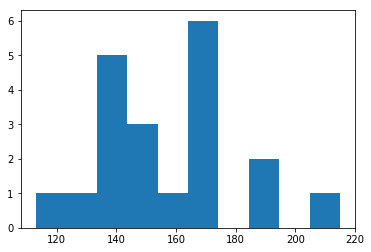

In [43]:
from matplotlib import pyplot
pyplot.hist(multistage.Weight)
pyplot.show()

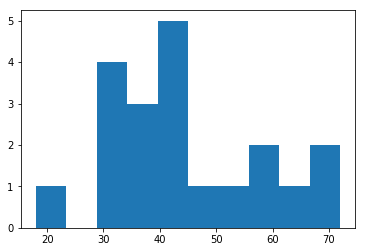

In [44]:
from matplotlib import pyplot
pyplot.hist(multistage.Age)
pyplot.show()